### Authors
Felipe Carvalho Ueta,  7210491<br>
Felipe Henrique Rubim,      8105710<br>

# ***Initial Data Processing*** 
##           ***- Duplicates***
##           ***- Time Periods***
##           ***- Vizualization***
##           ***- Missing***
##           ***- Outliers***
##           ***- Tecnical Indicators***

In [3]:
# Import required packages
import os
import sys
sys.path.append('../')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.ensemble import IsolationForest

from IPython.display import display, Math, Latex
from src.finance_ml.outliers.outliers import DataOutliers
from src.finance_ml.data_preparation.data_preparation import DataLoader
from src.finance_ml.Outlier_Detection_using_Isolation_forest.isolation_forest import OutlierDetector, load_and_prepare_data

from src.finance_ml.data_preparation.data_cleaning import remove_duplicated_values_by_index, treatments_for_missing
from src.finance_ml.data_preparation.data_periods import new_time_periods
from src.finance_ml.data_preparation.data_viz import get_charts
from src.finance_ml.data_preparation.data_outliers import remove_outliers
from src.finance_ml.data_preparation.data_tecnical_indicators import list_groups_of_functions, calculate_tecnical_indicators

import talib as ta

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Load dataset

In [5]:
gld = '../data/commodities/GLD_2020-04-07_2022-04-06.parquet'
pdbc = '../data/commodities/PDBC_2020-04-07_2022-04-06.parquet'
slv = '../data/commodities/SLV_2020-04-07_2022-04-06.parquet'

In [6]:
dataloader = DataLoader(time_index_col='DATE',
                        keep_cols=['VOLUME', 'OPEN', 'HIGHT', 'LOW', 'CLOSE', 'VW', 'TRANSACTIONS'])

In [7]:
df = load_and_prepare_data(gld, dataloader, 'GLD',150000)
df = df.sort_index()

print(df.shape)

df.head()

(150000, 7)


,GLD_VOLUME,GLD_OPEN,GLD_HIGHT,GLD_LOW,GLD_CLOSE,GLD_VW,GLD_TRANSACTIONS
DATE,,,,,,,
2020-04-07 15:43:00,21071.0,155.880,155.94,155.860,155.926,155.9052,152.0
2020-04-07 15:44:00,23010.0,155.930,155.97,155.900,155.900,155.9342,165.0
2020-04-07 15:45:00,31544.0,155.920,155.94,155.720,155.735,155.8012,292.0
2020-04-07 15:46:00,42645.0,155.760,155.84,155.760,155.840,155.7910,153.0
2020-04-07 15:47:00,3735.0,155.805,155.82,155.795,155.810,155.8070,47.0


# Cleaning

### Remove duplicated values

In [10]:
df = remove_duplicated_values_by_index(df)

print(df.shape)

(149450, 7)


### Treat missing data

In [12]:
print(df.shape)
df.isnull().sum()

(149450, 7)


GLD_VOLUME          0
GLD_OPEN            0
GLD_HIGHT           0
GLD_LOW             0
GLD_CLOSE           0
GLD_VW              4
GLD_TRANSACTIONS    4
dtype: int64

In [13]:
df = treatments_for_missing(df, type = 1)

In [14]:
print(df.shape)
df.isnull().sum()

(149446, 7)


GLD_VOLUME          0
GLD_OPEN            0
GLD_HIGHT           0
GLD_LOW             0
GLD_CLOSE           0
GLD_VW              0
GLD_TRANSACTIONS    0
dtype: int64

# Time periods

### Create new time periods

In [17]:
df = new_time_periods(df)

df.head()

,YearMonthDay,YearMonth,Week,GLD_HIGHT,GLD_VOLUME,GLD_OPEN,GLD_CLOSE,GLD_LOW,GLD_TRANSACTIONS,GLD_VW
DATE,,,,,,,,,,
2020-04-07 15:43:00,2020-04-07,2020-04,s1,155.94,21071.0,155.880,155.926,155.860,152.0,155.9052
2020-04-07 15:44:00,2020-04-07,2020-04,s1,155.97,23010.0,155.930,155.900,155.900,165.0,155.9342
2020-04-07 15:45:00,2020-04-07,2020-04,s1,155.94,31544.0,155.920,155.735,155.720,292.0,155.8012
2020-04-07 15:46:00,2020-04-07,2020-04,s1,155.84,42645.0,155.760,155.840,155.760,153.0,155.7910
2020-04-07 15:47:00,2020-04-07,2020-04,s1,155.82,3735.0,155.805,155.810,155.795,47.0,155.8070


# Graphics

Using get_charts from data_viz.py

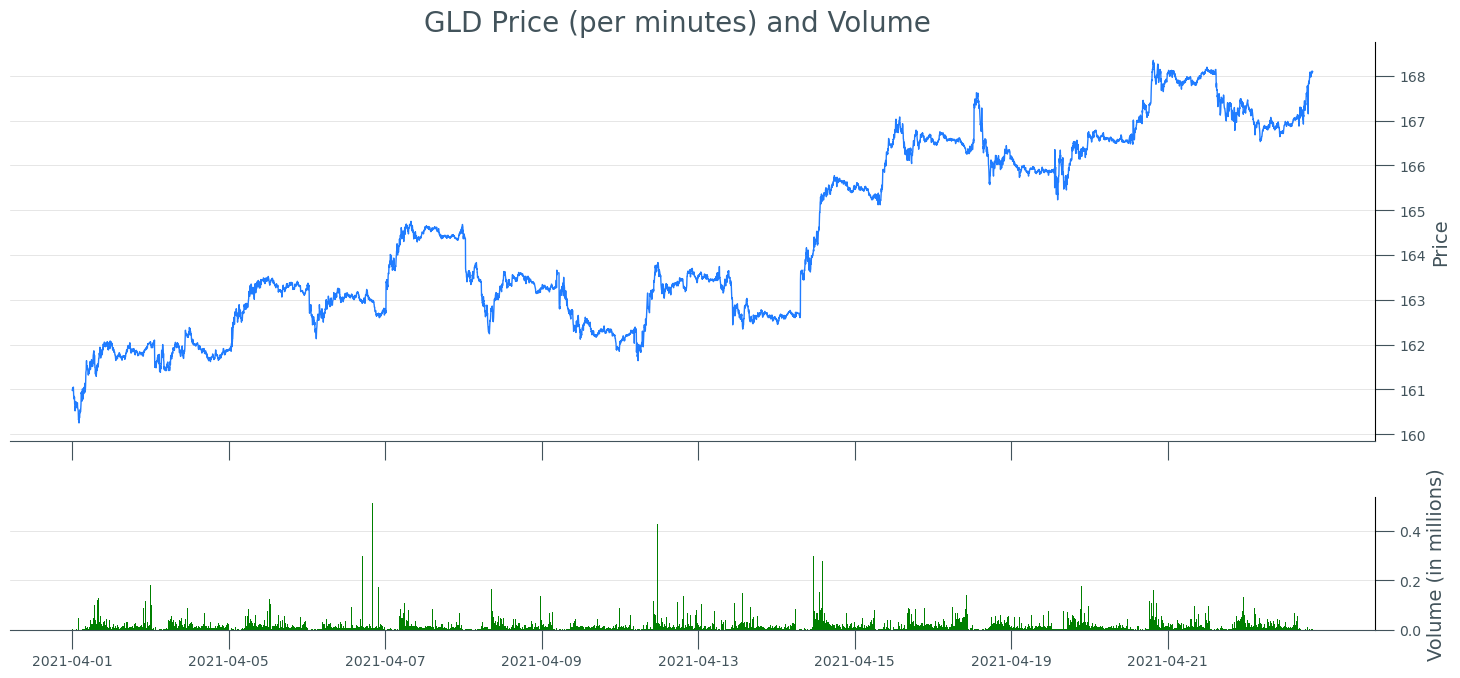

In [20]:
# Params
year_month = '2021-04'
date_label = 'YearMonthDay'
price      = 'GLD_CLOSE'
volume     = 'GLD_VOLUME'
rename     = ['date', 'date_label', 'price', 'volume']

# You can filter the dataset as you like
stock_data = df.loc[df['YearMonth']== year_month, [date_label, price, volume]].reset_index()

# Now it is important to correctly organize the dataset for the proposed visualization
# At the end, you need have four features: date, date label, price and volume
stock_data.columns = rename
stock_data = stock_data.astype({'date': 'str', 'date_label': 'str', 'price': 'float', 'volume': 'int'}, copy = False)

# viz function
get_charts(stock_data, 'GLD')

# Outliers

Using remove_outliers from data_outliers.py

In [23]:
df_out = remove_outliers(df)

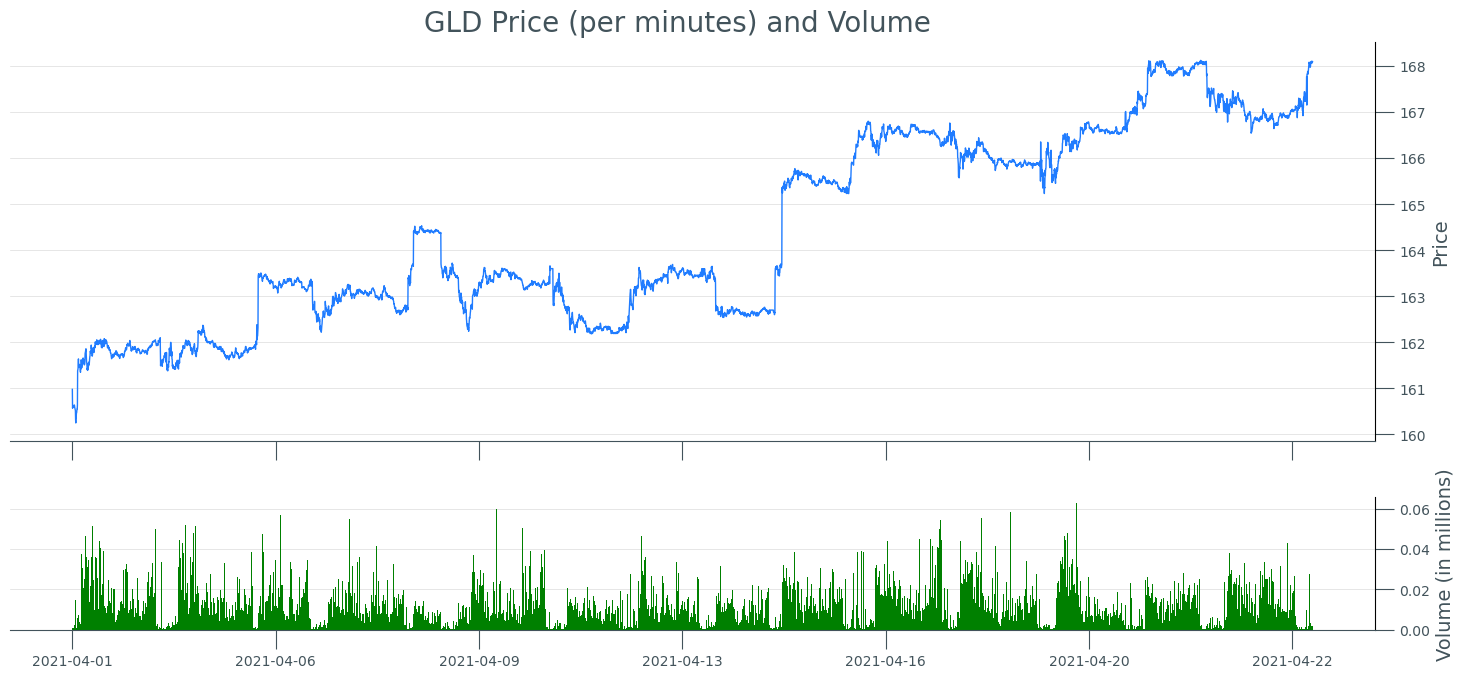

In [24]:
# Params
year_month = '2021-04'
date_label = 'YearMonthDay'
price      = 'GLD_CLOSE'
volume     = 'GLD_VOLUME'
rename     = ['date', 'date_label', 'price', 'volume']

# You can filter the dataset as you like
stock_data = df_out.loc[df_out['YearMonth']== year_month, [date_label, price, volume]].reset_index()

# Now it is important to correctly organize the dataset for the proposed visualization
# At the end, you need have four features: date, date label, price and volume
stock_data.columns = rename
stock_data = stock_data.astype({'date': 'str', 'date_label': 'str', 'price': 'float', 'volume': 'int'}, copy = False)

get_charts(stock_data, 'GLD')

# Indicators

In [26]:
# on command prompt
# conda install -c conda-forge ta-lib

In [27]:
# Obtém os grupos de funções
list_groups_of_functions()

-----------------------------------------
Group: Cycle Indicators
Functions:
     HT_DCPERIOD
     HT_DCPHASE
     HT_PHASOR
     HT_SINE
     HT_TRENDMODE


-----------------------------------------
Group: Math Operators
Functions:
     ADD
     DIV
     MAX
     MAXINDEX
     MIN
     MININDEX
     MINMAX
     MINMAXINDEX
     MULT
     SUB
     SUM


-----------------------------------------
Group: Math Transform
Functions:
     ACOS
     ASIN
     ATAN
     CEIL
     COS
     COSH
     EXP
     FLOOR
     LN
     LOG10
     SIN
     SINH
     SQRT
     TAN
     TANH


-----------------------------------------
Group: Momentum Indicators
Functions:
     ADX
     ADXR
     APO
     AROON
     AROONOSC
     BOP
     CCI
     CMO
     DX
     MACD
     MACDEXT
     MACDFIX
     MFI
     MINUS_DI
     MINUS_DM
     MOM
     PLUS_DI
     PLUS_DM
     PPO
     ROC
     ROCP
     ROCR
     ROCR100
     RSI
     STOCH
     STOCHF
     STOCHRSI
     TRIX
     ULTOSC
     WILLR


-------------

In [28]:
df_ = df_out.copy()

## Stochastic Oscillator

In [30]:
df_ = calculate_tecnical_indicators(df_, vars_in = ['GLD_HIGHT','GLD_LOW','GLD_CLOSE'], method = 'STOCH', parans = [7, 3, 0, 3, 0])
df_ = calculate_tecnical_indicators(df_, vars_in = ['GLD_HIGHT','GLD_LOW','GLD_CLOSE'], method = 'STOCH', parans = [21, 7, 0, 3, 0])
df_.tail().T

DATE,2021-04-23 12:42:00,2021-04-23 12:46:00,2021-04-23 12:47:00,2021-04-23 12:48:00,2021-04-23 12:50:00
YearMonthDay,2021-04-23,2021-04-23,2021-04-23,2021-04-23,2021-04-23
YearMonth,2021-04,2021-04,2021-04,2021-04,2021-04
Week,s4,s4,s4,s4,s4
GLD_HIGHT,168.07,168.06,168.1,168.08,168.09
GLD_VOLUME,300.0,123.0,253.0,2014.0,498.0
GLD_OPEN,168.07,168.06,168.1,168.08,168.09
GLD_CLOSE,168.07,168.06,168.1,168.08,168.09
GLD_LOW,168.07,168.06,168.1,168.08,168.09
GLD_TRANSACTIONS,2.0,4.0,7.0,8.0,4.0
GLD_VW,168.07,168.0654,168.0957,168.0799,168.09


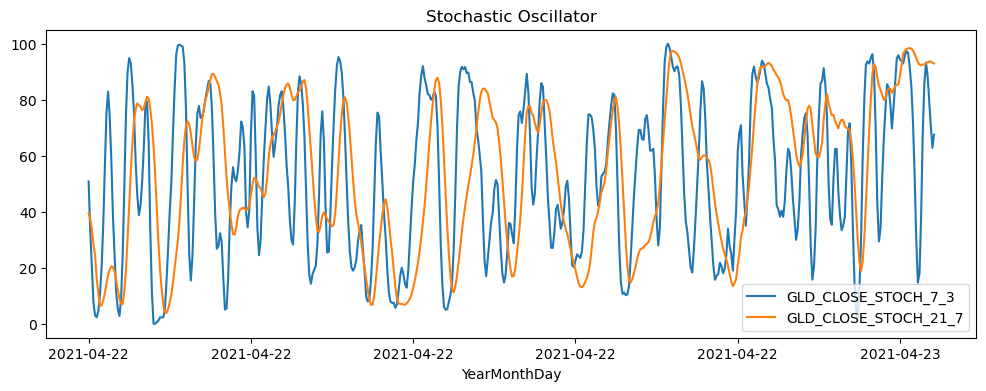

In [31]:
df_.loc[df_['YearMonthDay']>'2021-04-21',['YearMonthDay', 
                                          # 'GLD_CLOSE',
                                          'GLD_CLOSE_STOCH_7_3',
                                          'GLD_CLOSE_STOCH_21_7']].plot(x='YearMonthDay', figsize=(12,4))
plt.title("Stochastic Oscillator")
plt.show()

## Bollinger Bands

Bollinger Bands

Purpose: Measures volatility and helps identify price trends or reversals. It consists of a simple moving average (middle band) and two standard deviation bands (upper and lower).

Usefulness: Useful for spotting when the price is "stretching" beyond its typical range. When the price reaches the upper band, it might be overbought; at the lower band, it might be oversold. Squeezes (when bands are close) indicate low volatility and potential breakouts, while wide bands suggest high volatility and potential trend changes.

In [33]:
df_ = calculate_tecnical_indicators(df_, vars_in = ['GLD_CLOSE'], method = 'BBANDS', parans = [20, 2, 2, 0])
df_ = calculate_tecnical_indicators(df_, vars_in = ['GLD_CLOSE'], method = 'BBANDS', parans = [14, 2, 2, 0])
df_ = calculate_tecnical_indicators(df_, vars_in = ['GLD_CLOSE'], method = 'BBANDS', parans = [7, 2, 2, 0])
df_ = calculate_tecnical_indicators(df_, vars_in = ['GLD_CLOSE'], method = 'BBANDS', parans = [20, 4, 4, 0])
df_ = calculate_tecnical_indicators(df_, vars_in = ['GLD_CLOSE'], method = 'BBANDS', parans = [20, 3, 3, 0])

df_.tail().T

DATE,2021-04-23 12:42:00,2021-04-23 12:46:00,2021-04-23 12:47:00,2021-04-23 12:48:00,2021-04-23 12:50:00
YearMonthDay,2021-04-23,2021-04-23,2021-04-23,2021-04-23,2021-04-23
YearMonth,2021-04,2021-04,2021-04,2021-04,2021-04
Week,s4,s4,s4,s4,s4
GLD_HIGHT,168.07,168.06,168.1,168.08,168.09
GLD_VOLUME,300.0,123.0,253.0,2014.0,498.0
GLD_OPEN,168.07,168.06,168.1,168.08,168.09
GLD_CLOSE,168.07,168.06,168.1,168.08,168.09
GLD_LOW,168.07,168.06,168.1,168.08,168.09
GLD_TRANSACTIONS,2.0,4.0,7.0,8.0,4.0
GLD_VW,168.07,168.0654,168.0957,168.0799,168.09


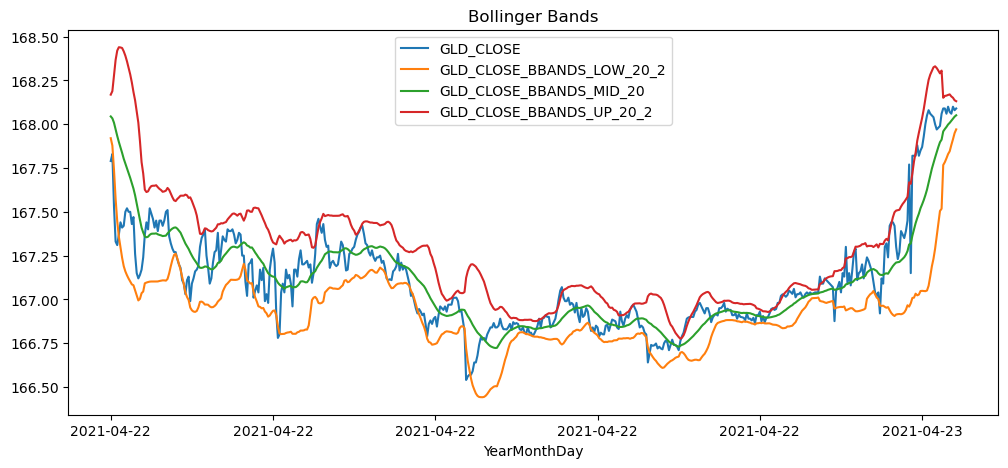

In [34]:
df_.loc[df_['YearMonthDay']>'2021-04-21',['YearMonthDay', 
                                          'GLD_CLOSE', 
                                          'GLD_CLOSE_BBANDS_LOW_20_2', 
                                          'GLD_CLOSE_BBANDS_MID_20', 
                                          'GLD_CLOSE_BBANDS_UP_20_2']].plot(x='YearMonthDay',figsize=(12,5))
plt.title("Bollinger Bands")
plt.show()

## Relative Strength Index

Relative Strength Index (RSI)

Purpose: Measures the speed and change of price movements, indicating momentum.

Usefulness: Helps detect overbought (typically above 70) and oversold (typically below 30) conditions, signaling potential reversals. RSI is valuable for momentum-based trading strategies and can be used to confirm other trend indicators or spot divergences between the price and RSI.

In [36]:
df_ = calculate_tecnical_indicators(df_, vars_in = ['GLD_CLOSE'], method = 'RSI', parans = [7])
df_ = calculate_tecnical_indicators(df_, vars_in = ['GLD_CLOSE'], method = 'RSI', parans = [14])
df_ = calculate_tecnical_indicators(df_, vars_in = ['GLD_CLOSE'], method = 'RSI', parans = [21])
df_ = calculate_tecnical_indicators(df_, vars_in = ['GLD_CLOSE'], method = 'RSI', parans = [50])
df_ = calculate_tecnical_indicators(df_, vars_in = ['GLD_CLOSE'], method = 'RSI', parans = [100])
df_ = calculate_tecnical_indicators(df_, vars_in = ['GLD_CLOSE'], method = 'RSI', parans = [200])

df_.tail().T

DATE,2021-04-23 12:42:00,2021-04-23 12:46:00,2021-04-23 12:47:00,2021-04-23 12:48:00,2021-04-23 12:50:00
YearMonthDay,2021-04-23,2021-04-23,2021-04-23,2021-04-23,2021-04-23
YearMonth,2021-04,2021-04,2021-04,2021-04,2021-04
Week,s4,s4,s4,s4,s4
GLD_HIGHT,168.07,168.06,168.1,168.08,168.09
GLD_VOLUME,300.0,123.0,253.0,2014.0,498.0
GLD_OPEN,168.07,168.06,168.1,168.08,168.09
GLD_CLOSE,168.07,168.06,168.1,168.08,168.09
GLD_LOW,168.07,168.06,168.1,168.08,168.09
GLD_TRANSACTIONS,2.0,4.0,7.0,8.0,4.0
GLD_VW,168.07,168.0654,168.0957,168.0799,168.09


(0.0, 100.0)

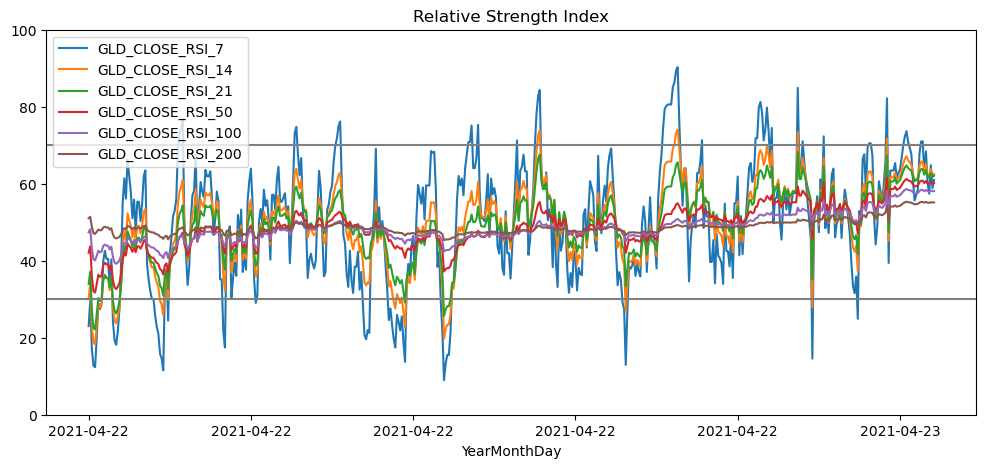

In [37]:
df_.loc[df_['YearMonthDay']>'2021-04-21',['YearMonthDay',
                                          'GLD_CLOSE_RSI_7',
                                          'GLD_CLOSE_RSI_14',
                                          'GLD_CLOSE_RSI_21',
                                          'GLD_CLOSE_RSI_50',
                                          'GLD_CLOSE_RSI_100',
                                          'GLD_CLOSE_RSI_200']].plot(x='YearMonthDay',figsize=(12,5))
plt.title("Relative Strength Index")
plt.axhline(y=30, color='gray', linestyle='-')
plt.axhline(y=70, color='gray', linestyle='-')
plt.ylim(0,100)
# x = np.arange(0, len(df_['GLD_CLOSE_RSI_21']),0.1)

## Average Directional Movement Index (ADX)

Average Directional Movement Index (ADX)

Purpose: Measures the strength of a trend without indicating its direction.

Usefulness: An ADX above 20 or 25 often indicates a strong trend (bullish or bearish). It’s frequently used alongside other indicators to confirm trends and avoid false signals. A rising ADX confirms trend strength, while a falling ADX suggests a weakening trend or a potential range-bound market.

In [39]:
df_ = calculate_tecnical_indicators(df_, vars_in = ['GLD_HIGHT','GLD_LOW','GLD_CLOSE'], method = 'PLUS_DI', parans = [14])
df_ = calculate_tecnical_indicators(df_, vars_in = ['GLD_HIGHT','GLD_LOW','GLD_CLOSE'], method = 'PLUS_DI', parans = [21])
df_ = calculate_tecnical_indicators(df_, vars_in = ['GLD_HIGHT','GLD_LOW','GLD_CLOSE'], method = 'PLUS_DI', parans = [50])
df_ = calculate_tecnical_indicators(df_, vars_in = ['GLD_HIGHT','GLD_LOW','GLD_CLOSE'], method = 'PLUS_DI', parans = [100])
df_ = calculate_tecnical_indicators(df_, vars_in = ['GLD_HIGHT','GLD_LOW','GLD_CLOSE'], method = 'PLUS_DI', parans = [200])

df_ = calculate_tecnical_indicators(df_, vars_in = ['GLD_HIGHT','GLD_LOW','GLD_CLOSE'], method = 'MINUS_DI', parans = [14])
df_ = calculate_tecnical_indicators(df_, vars_in = ['GLD_HIGHT','GLD_LOW','GLD_CLOSE'], method = 'MINUS_DI', parans = [21])
df_ = calculate_tecnical_indicators(df_, vars_in = ['GLD_HIGHT','GLD_LOW','GLD_CLOSE'], method = 'MINUS_DI', parans = [50])
df_ = calculate_tecnical_indicators(df_, vars_in = ['GLD_HIGHT','GLD_LOW','GLD_CLOSE'], method = 'MINUS_DI', parans = [100])
df_ = calculate_tecnical_indicators(df_, vars_in = ['GLD_HIGHT','GLD_LOW','GLD_CLOSE'], method = 'MINUS_DI', parans = [200])

df_ = calculate_tecnical_indicators(df_, vars_in = ['GLD_HIGHT','GLD_LOW','GLD_CLOSE'], method = 'ADX', parans = [14])
df_ = calculate_tecnical_indicators(df_, vars_in = ['GLD_HIGHT','GLD_LOW','GLD_CLOSE'], method = 'ADX', parans = [21])
df_ = calculate_tecnical_indicators(df_, vars_in = ['GLD_HIGHT','GLD_LOW','GLD_CLOSE'], method = 'ADX', parans = [50])
df_ = calculate_tecnical_indicators(df_, vars_in = ['GLD_HIGHT','GLD_LOW','GLD_CLOSE'], method = 'ADX', parans = [100])
df_ = calculate_tecnical_indicators(df_, vars_in = ['GLD_HIGHT','GLD_LOW','GLD_CLOSE'], method = 'ADX', parans = [200])

df_.tail().T

DATE,2021-04-23 12:42:00,2021-04-23 12:46:00,2021-04-23 12:47:00,2021-04-23 12:48:00,2021-04-23 12:50:00
YearMonthDay,2021-04-23,2021-04-23,2021-04-23,2021-04-23,2021-04-23
YearMonth,2021-04,2021-04,2021-04,2021-04,2021-04
Week,s4,s4,s4,s4,s4
GLD_HIGHT,168.07,168.06,168.1,168.08,168.09
GLD_VOLUME,300.0,123.0,253.0,2014.0,498.0
GLD_OPEN,168.07,168.06,168.1,168.08,168.09
GLD_CLOSE,168.07,168.06,168.1,168.08,168.09
GLD_LOW,168.07,168.06,168.1,168.08,168.09
GLD_TRANSACTIONS,2.0,4.0,7.0,8.0,4.0
GLD_VW,168.07,168.0654,168.0957,168.0799,168.09


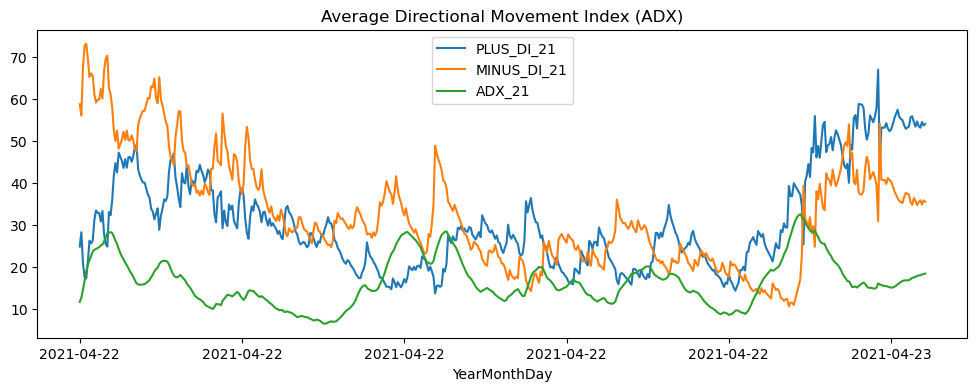

In [40]:
df_.loc[df_['YearMonthDay']>'2021-04-21',['YearMonthDay', 
                                          # 'GLD_CLOSE',
                                          'PLUS_DI_21',
                                          'MINUS_DI_21', 
                                          'ADX_21']].plot(x='YearMonthDay', figsize=(12,4))
plt.title("Average Directional Movement Index (ADX)")
plt.show()

## Exponential Moving Average

Exponential Moving Average (EMA)

Purpose: A moving average that gives more weight to recent prices, making it more responsive to new information.

Usefulness: Great for spotting trends and reversals. EMAs are especially useful in fast-moving markets, where price trends may change quickly. Shorter EMAs (e.g., 12-period) respond faster to price changes and are useful for shorter time frames, while longer EMAs (e.g., 50-period) work well for long-term trend analysis.

In [42]:
df_ = calculate_tecnical_indicators(df_, vars_in = ['GLD_CLOSE'], method = 'EMA', parans = [14])
df_ = calculate_tecnical_indicators(df_, vars_in = ['GLD_CLOSE'], method = 'EMA', parans = [21])
df_ = calculate_tecnical_indicators(df_, vars_in = ['GLD_CLOSE'], method = 'EMA', parans = [50])
df_ = calculate_tecnical_indicators(df_, vars_in = ['GLD_CLOSE'], method = 'EMA', parans = [100])
df_ = calculate_tecnical_indicators(df_, vars_in = ['GLD_CLOSE'], method = 'EMA', parans = [200])

df_.tail().T

DATE,2021-04-23 12:42:00,2021-04-23 12:46:00,2021-04-23 12:47:00,2021-04-23 12:48:00,2021-04-23 12:50:00
YearMonthDay,2021-04-23,2021-04-23,2021-04-23,2021-04-23,2021-04-23
YearMonth,2021-04,2021-04,2021-04,2021-04,2021-04
Week,s4,s4,s4,s4,s4
GLD_HIGHT,168.07,168.06,168.1,168.08,168.09
GLD_VOLUME,300.0,123.0,253.0,2014.0,498.0
GLD_OPEN,168.07,168.06,168.1,168.08,168.09
GLD_CLOSE,168.07,168.06,168.1,168.08,168.09
GLD_LOW,168.07,168.06,168.1,168.08,168.09
GLD_TRANSACTIONS,2.0,4.0,7.0,8.0,4.0
GLD_VW,168.07,168.0654,168.0957,168.0799,168.09


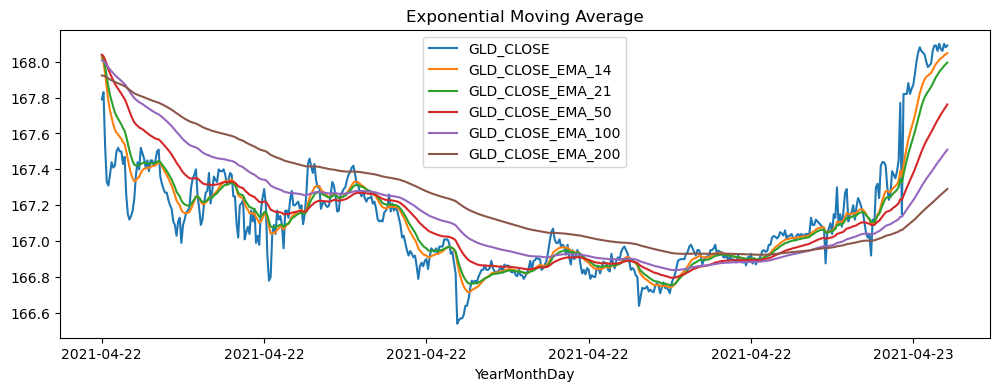

In [43]:
df_.loc[df_['YearMonthDay']>'2021-04-21',['YearMonthDay', 
                                          'GLD_CLOSE',
                                          'GLD_CLOSE_EMA_14',
                                          'GLD_CLOSE_EMA_21', 
                                          'GLD_CLOSE_EMA_50',
                                          'GLD_CLOSE_EMA_100',
                                          'GLD_CLOSE_EMA_200']].plot(x='YearMonthDay', figsize=(12,4))
plt.title("Exponential Moving Average")
plt.show()

## Simple Moving Average

Simple Moving Average (SMA)

Purpose: A basic average of prices over a specific period, often used to smooth out price action.

Usefulness: Useful for spotting the overall trend. SMA crossovers (e.g., a 50-day SMA crossing above a 200-day SMA, known as a "golden cross") can signal trend reversals. It provides a general trend view but lags behind the EMA, so it may be better suited for long-term analysis.

In [45]:
df_ = calculate_tecnical_indicators(df_, vars_in = ['GLD_CLOSE'], method = 'SMA', parans = [14])
df_ = calculate_tecnical_indicators(df_, vars_in = ['GLD_CLOSE'], method = 'SMA', parans = [21])
df_ = calculate_tecnical_indicators(df_, vars_in = ['GLD_CLOSE'], method = 'SMA', parans = [50])
df_ = calculate_tecnical_indicators(df_, vars_in = ['GLD_CLOSE'], method = 'SMA', parans = [100])
df_ = calculate_tecnical_indicators(df_, vars_in = ['GLD_CLOSE'], method = 'SMA', parans = [200])

df_.tail().T

DATE,2021-04-23 12:42:00,2021-04-23 12:46:00,2021-04-23 12:47:00,2021-04-23 12:48:00,2021-04-23 12:50:00
YearMonthDay,2021-04-23,2021-04-23,2021-04-23,2021-04-23,2021-04-23
YearMonth,2021-04,2021-04,2021-04,2021-04,2021-04
Week,s4,s4,s4,s4,s4
GLD_HIGHT,168.07,168.06,168.1,168.08,168.09
GLD_VOLUME,300.0,123.0,253.0,2014.0,498.0
GLD_OPEN,168.07,168.06,168.1,168.08,168.09
GLD_CLOSE,168.07,168.06,168.1,168.08,168.09
GLD_LOW,168.07,168.06,168.1,168.08,168.09
GLD_TRANSACTIONS,2.0,4.0,7.0,8.0,4.0
GLD_VW,168.07,168.0654,168.0957,168.0799,168.09


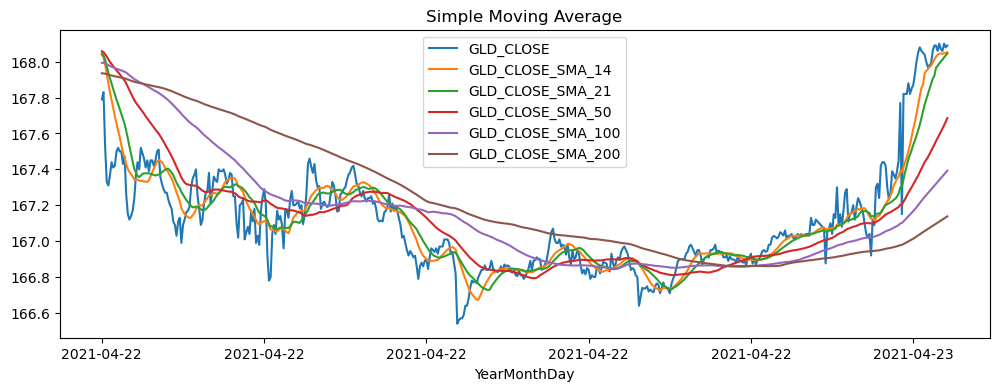

In [46]:
df_.loc[df_['YearMonthDay']>'2021-04-21',['YearMonthDay', 
                                          'GLD_CLOSE',
                                          'GLD_CLOSE_SMA_14',
                                          'GLD_CLOSE_SMA_21', 
                                          'GLD_CLOSE_SMA_50',
                                          'GLD_CLOSE_SMA_100',
                                          'GLD_CLOSE_SMA_200']].plot(x='YearMonthDay', figsize=(12,4))
plt.title("Simple Moving Average")
plt.show()

# Final asset dataset

In [48]:
df_.tail().T

DATE,2021-04-23 12:42:00,2021-04-23 12:46:00,2021-04-23 12:47:00,2021-04-23 12:48:00,2021-04-23 12:50:00
YearMonthDay,2021-04-23,2021-04-23,2021-04-23,2021-04-23,2021-04-23
YearMonth,2021-04,2021-04,2021-04,2021-04,2021-04
Week,s4,s4,s4,s4,s4
GLD_HIGHT,168.07,168.06,168.1,168.08,168.09
GLD_VOLUME,300.0,123.0,253.0,2014.0,498.0
GLD_OPEN,168.07,168.06,168.1,168.08,168.09
GLD_CLOSE,168.07,168.06,168.1,168.08,168.09
GLD_LOW,168.07,168.06,168.1,168.08,168.09
GLD_TRANSACTIONS,2.0,4.0,7.0,8.0,4.0
GLD_VW,168.07,168.0654,168.0957,168.0799,168.09


In [49]:
print('Total number of new tecnical indicators:', df_.shape[1]-10)

Total number of new tecnical indicators: 46
